# チーモン VS 馬鹿よ　どっちが人気なの!? 　曜日対決！！！

In [1]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [2]:
import pandas as pd

In [30]:
def count_tweet_week(tbl_name):
    query = '''
    SELECT count(id), week FROM {tbl} GROUP BY week
    '''.format(tbl=tbl_name)
    count_id = c.execute(query)
    
    df_tbl = pd.DataFrame(columns=[tbl_name])
    
    for row in count_id:
        df_addition_row = pd.DataFrame([row[0]], index=[row[1]])
        df_addition_row.columns = [tbl_name]
        df_tbl = pd.concat([df_tbl,df_addition_row], axis=0)
        
    df_norm_tbl = df_tbl.div(df_tbl.T.sum(1), axis=1)
    
    return df_norm_tbl

In [31]:
df_norm_bakayo = count_tweet_week('bakayo_time')

In [36]:
df_norm_chimon = count_tweet_week('chimon_time')

### 棒グラフで比較するためにDataFrameをMerge

In [37]:
#正規化した方のマージ
df_norm_VS = df_norm_bakayo.join(df_norm_chimon)

### 描画

In [38]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

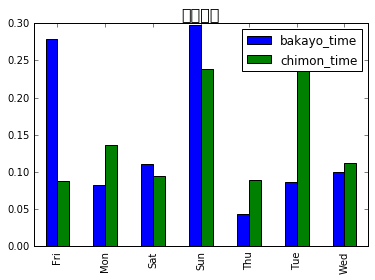

In [40]:
#正規化
df_norm_VS.plot.bar(y=['bakayo_time', 'chimon_time'])
plt.title(u'棒グラフ', size=16)